# Star Wars Survey

The goal of this project is to clean the dataset of Star Wars Survey and explore the data as well as perform analysis.

Before __Star Wars: The Force Awakens (Episode 7)__ to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that __“The Empire Strikes Back”__ is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received __1185 responses__.

My objective is to discover any pattern or interesting findings in the survey data they collected.


# Introduction

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import operator # To sort values in dictionary, I use operator library

# Read the dataset with specified encoding
star_wars_orginal = pd.read_csv('StarWars.csv', encoding='ISO-8859-1')
star_wars_orginal.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

I observe that there is a row containing NaN value in RespondentID column. I will delete all the rows containing NaN value in RespondentID column.

In [2]:
# Deleting the rows with null RespondentID value
star_wars_orginal = star_wars_orginal[pd.notnull(star_wars_orginal['RespondentID'])]
star_wars_orginal.shape

(1186, 38)

In [3]:
star_wars_orginal.describe(include='all')

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,1.186000e+03,1186,836,673,571,550,607,758,738,835,...,826,828,828,213,1068,1046,1046,858,1036,1043
unique,NaN,2,2,1,1,1,1,1,1,6,...,6,3,2,2,2,2,4,5,5,9
top,NaN,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,No,No,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,NaN,936,552,673,571,550,607,758,738,237,...,605,325,615,114,641,549,291,298,328,181
mean,3.290128e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.055639e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.288373e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.289451e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.290147e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.290814e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
star_wars_orginal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              673 non-null object
Unnamed: 4                                                                                                                                       571 non-null object
Unnamed: 5                                                       

In [5]:
star_wars_orginal.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Rename Columns

I will rename all the column names to be more clear, tidy and standardized. All of the column names will be shortened and snakecase.

For the columns about asking whether the movie has been seen or not, I will rename these columns like "seen_1", "seen_2" and so on ,meaning, for instance, seen_1 if the Star Wars 1 has been seen.

For the columns about asking the rank of the episodes, I will do a similar process which is naming as ranking_1, ranking_2 and so on.

For the columns about asking if they like the characters, I will name the columns with only the name of characters.

In [6]:
# Rename all of the columns using mapping
name_mapping = {'RespondentID':'id', 'Have you seen any of the 6 films in the Star Wars franchise?':'ever_seen', 'Do you consider yourself to be a fan of the Star Wars film franchise?':'fan_star_wars', 'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1', 'Unnamed: 4':'seen_2', 'Unnamed: 5':'seen_3', 'Unnamed: 6':'seen_4', 'Unnamed: 7':'seen_5', 'Unnamed: 8':'seen_6', 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1', 'Unnamed: 10':'ranking_2', 'Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5', 'Unnamed: 14':'ranking_6', 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han Solo', 'Unnamed: 16':'Luke Skywalker', 'Unnamed: 17':'Princess Leia Organa', 'Unnamed: 18':'Anakin Skywalker', 'Unnamed: 19':'Obi Wan Kenobi', 'Unnamed: 20':'Emperor Palpatine', 'Unnamed: 21':'Darth Vader', 'Unnamed: 22':'Lando Calrissian', 'Unnamed: 23':'Boba Fett', 'Unnamed: 24':'C-3P0', 'Unnamed: 25':'R2 D2', 'Unnamed: 26':'Jar Jar Binks', 'Unnamed: 27':'Padme Amidala', 'Unnamed: 28':'Yoda', 'Which character shot first?':'shot_first',
       'Are you familiar with the Expanded Universe?':'familiar_expanded_universe',
       'Do you consider yourself to be a fan of the Expanded Universe?æ':'fan_expanded_universe',
       'Do you consider yourself to be a fan of the Star Trek franchise?':'fan_star_trek',
       'Gender':'gender', 'Age':'age', 'Household Income':'household_income', 'Education':'education',
       'Location (Census Region)':'location'}

star_wars_orginal = star_wars_orginal.rename(columns=name_mapping)


# Cleaning the Data

The columns 'seen_x' are True/False columns therefore, their values need to be Boolean values. If the value given is NaN or respondent didn't answer the question, I will consider them as False.


In [7]:
# Copy the dataset and from now on I am working on copy
star_wars = star_wars_orginal.copy()

# The function which recognizes if the movie was seen and return True/False accordingly
movie_names = list(star_wars.iloc[0, 3:9])
def make_boolean(val):
    if val in movie_names:
        return True
    else:
        return False

# Perform the value replacement
for col in star_wars.iloc[:,3:9]:
    star_wars[col] = star_wars[col].apply(make_boolean)


Now, I will convert the values of ranking columns from string to float.

In [8]:
# Perform the value type update
for col in star_wars.iloc[:,9:15]:
    star_wars[col] = star_wars[col].astype(float)

The character columns have values as follows;
- Very favorably                              
- NaN                                            
- Somewhat favorably                             
- Neither favorably nor unfavorably (neutral)     
- Somewhat unfavorably                           
- Unfamiliar (N/A)                                
- Very unfavorably 

I will transfrom them into numeric values from 5 to 1; 5 for very favorably and 1 for very unfavorably. Also, unfamiliar (N/A) will be converted to NaN as it has no contribution to data. Then, all the values are transformed to float.

In [9]:
# Perform the value update 
value_mapping = {'Very favorably':'5', 'Somewhat favorably':'4', 'Neither favorably nor unfavorably (neutral)':'3', 'Somewhat unfavorably':'2', 'Very unfavorably':'1', 'Unfamiliar (N/A)':np.nan}
for col in star_wars.iloc[:,15:29]:
    star_wars[col] = star_wars[col].replace(value_mapping).astype('float')

Finally, I will be replacing "Yes/No" values with "True/False" in columns stated below;
- ever_seen
<br>
- fan_star_wars
<br>
- fan_star_trek
<br>
- familiar_expanded_universe
<br>
- fan_expanded_universe 

Also, the null values will be counted as False.

In [10]:
# Perform the value replacement
columns = ['ever_seen','fan_star_wars', 'fan_star_trek', 'familiar_expanded_universe', 'fan_expanded_universe']
yes_no = {"Yes": True, "No": False, np.nan: False}
for col in columns:
    star_wars[col] = star_wars[col].map(yes_no)

The one of the issues that I observe is some participants indicated that they watched at least one of the episodes however, they didn't indicate any of the episodes they have seen. This cause a wrong data. There are 101 rows having the stated issue.

To handle this issue, I will remove those rows from data.

In [11]:
# Filter and save the data
print('Data shape before filter:', star_wars.shape)
star_wars = star_wars[((star_wars['ever_seen'] == True) & (star_wars.iloc[:,3:9].sum(axis=1)>0)) | (star_wars['ever_seen']==False)]
print('Data shape after filter :', star_wars.shape)


Data shape before filter: (1186, 38)
Data shape after filter : (1085, 38)


# Rank and Watch Analysis

Now, I will analyze the rank and the watch frequency of the movies __on overall__ then, based on __gender__, __education__, __location__ and __household income__ observing if there is a significant difference.

## Finding the Highest-Ranked Movie

I've cleaned the data to get some information from it. Firstly, I will denote the __highest-ranked movie__ among all of them.

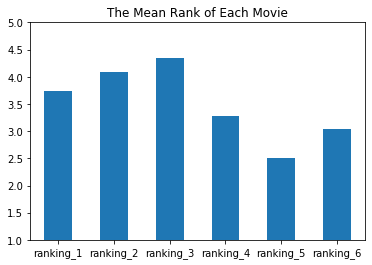

In [12]:
# Find the highest-ranked movie
star_wars.iloc[:, 9:15].mean().plot.bar(title='The Mean Rank of Each Movie', rot=0, ylim=(1,5))

The highest ranked movie is the __5th movie__ and the least one is the __3rd movie__. Remember that a lower ranking means better.

## Finding How Many Times Each Movie was Seen

I will plot __how many times each movie was seen__ and compare with rankings.

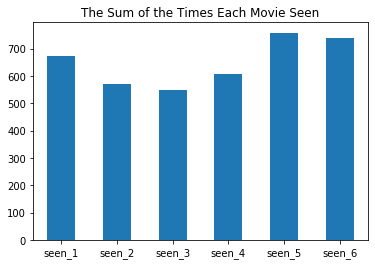

In [13]:
# Find the most-watched movie
star_wars.iloc[:, 3:9].sum().plot.bar(title='The Sum of the Times Each Movie Seen', rot=0)


__The 5th movie__ is the most watched and the __3rd movies__ is the least watched.

Also, I noticed that the sum of times each movie seen is almost in the same order with the mean rank of each movie.

I may conclude that the original movies were ranked as the best and were watched the most.

## Gender-based analysis

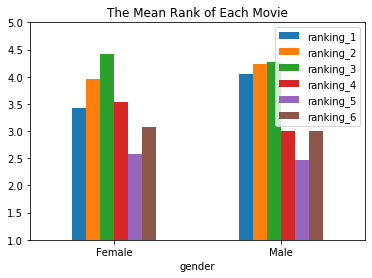

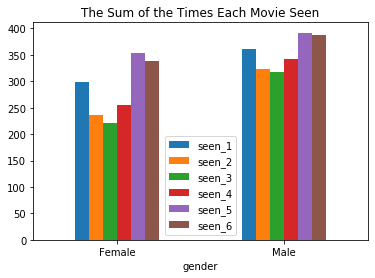

In [14]:
# Group the data based on gender calculating the mean of columns
grouped_gender_mean = star_wars.groupby('gender').agg(np.mean)

# Group the data based on gender calculating the sum of columns
grouped_gender_sum = star_wars.groupby('gender').agg(np.sum)

# The rank of movies based on gender
grouped_gender_mean.iloc[:,9:15].plot.bar(title='The Mean Rank of Each Movie', rot=0, ylim=(1,5))
plt.show()

# The watch frequency of movies based on gender
grouped_gender_sum.iloc[:,3:9].plot.bar(title='The Sum of the Times Each Movie Seen', rot=0)
plt.show()

The ranking order is the same between males and females however, __males__ watched more all of the episodes, especially __episodes 1-4__, compared to __females__.

## Education-based Analysis

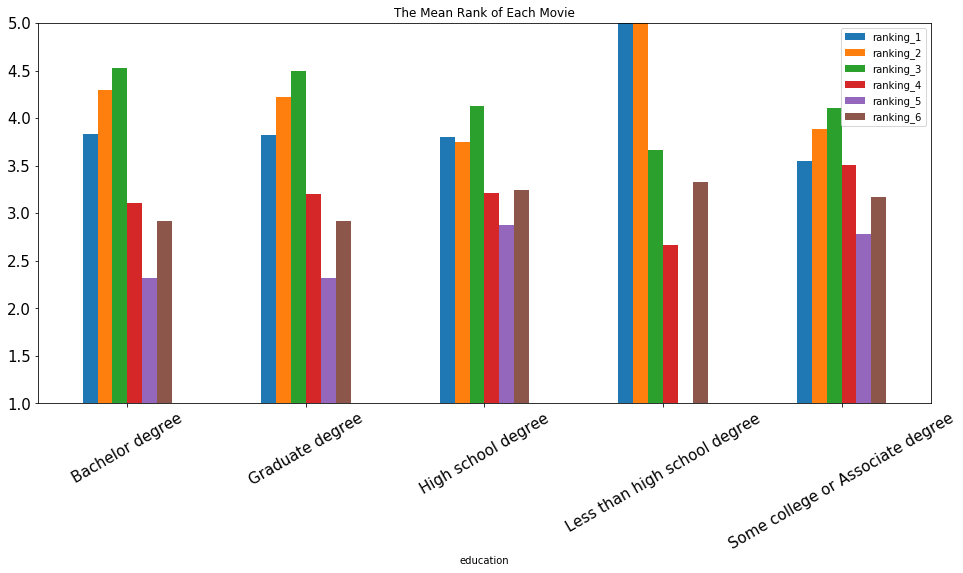

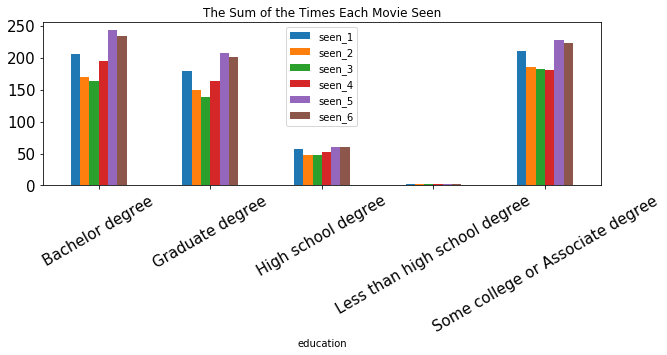

In [15]:
# Group the data based on education calculating the mean of columns
grouped_education_mean = star_wars.groupby('education').agg(np.mean)

# Group the data based on education calculating the sum of columns
grouped_education_sum = star_wars.groupby('education').agg(np.sum)

# The rank of movies based on education
grouped_education_mean.iloc[:,9:15].plot.bar(title='The Mean Rank of Each Movie', figsize=(16,7), fontsize=15, rot=30, ylim=(1,5))
plt.show()

# The watch frequency of movies based on education
grouped_education_sum.iloc[:,3:9].plot.bar(title='The Sum of the Times Each Movie Seen', figsize=(10,3), fontsize=15, rot=30)
plt.show()


The distribution of Star Wars Episode preferences of people who have __bachelor degree__, __graduate degree__, __some college or associate degree__ and __high school degree__ look like almost the same which is kind of expected. The least favorite episode among people with higher edication is __3rd movie__ while their favorite episode is the __5th episode__. The frequency of episodes seen among these groups except group with high school degree almost the same which is consistent.

However, the preference of people who has __less than high school degree__ differs from the other people having higher education degree. The most obvious observation is that the rank of movies according to this group are the most consistent across all of them. while __5th movie__ is their most favorite, __2nd movie__ is the least favorite. The main reason for this consistency is there are only __7 participants__ who have less than high school degree. That's why their watch times for all episodes look like almost zero.

## Location-based Analysis

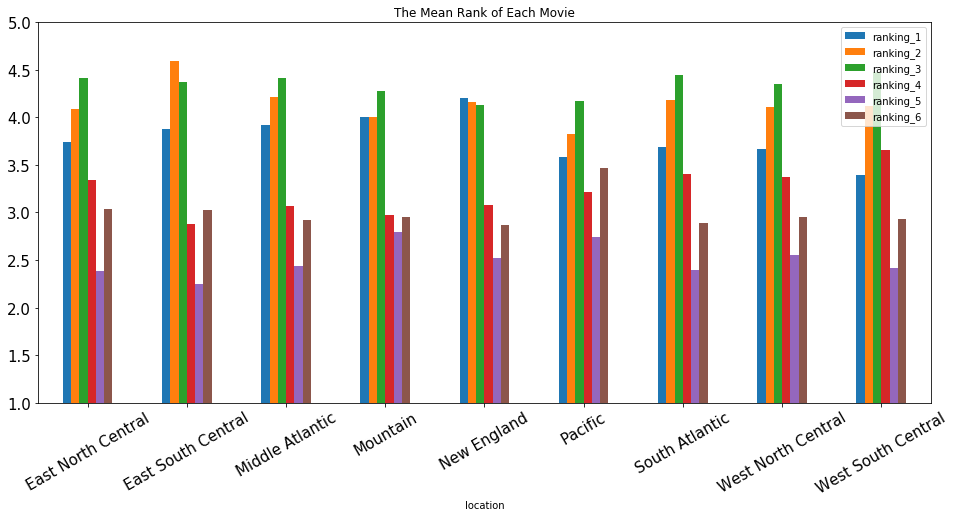

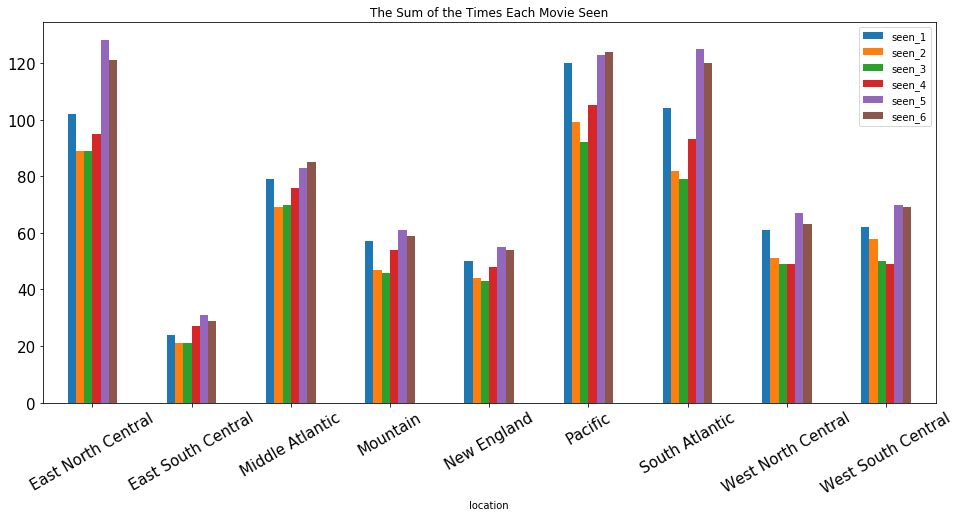

In [16]:
# Group the data based on location calculating the mean of columns
grouped_location_mean = star_wars.groupby('location').agg(np.mean)

# Group the data based on location calculating the sum of columns
grouped_location_sum = star_wars.groupby('location').agg(np.sum)

# The rank of movies based on location
grouped_location_mean.iloc[:,9:15].plot.bar(title='The Mean Rank of Each Movie', figsize=(16,7), fontsize=15, rot=30, ylim=(1,5))
plt.show()

# The watch frequency of movies based on location
grouped_location_sum.iloc[:,3:9].plot.bar(title='The Sum of the Times Each Movie Seen', figsize=(16,7), fontsize=15, rot=30)
plt.show()


The prefence of episodes across all locations looks very similar with small differences.

However, the frequency of the episodes being watched across the regions are different than each other. The regions watching the movie the most are __East North Central__, __Pasific__ and __South Atlantic__. The region watching the movie the least is __East South Central__. 

## Household Income-based Analysis

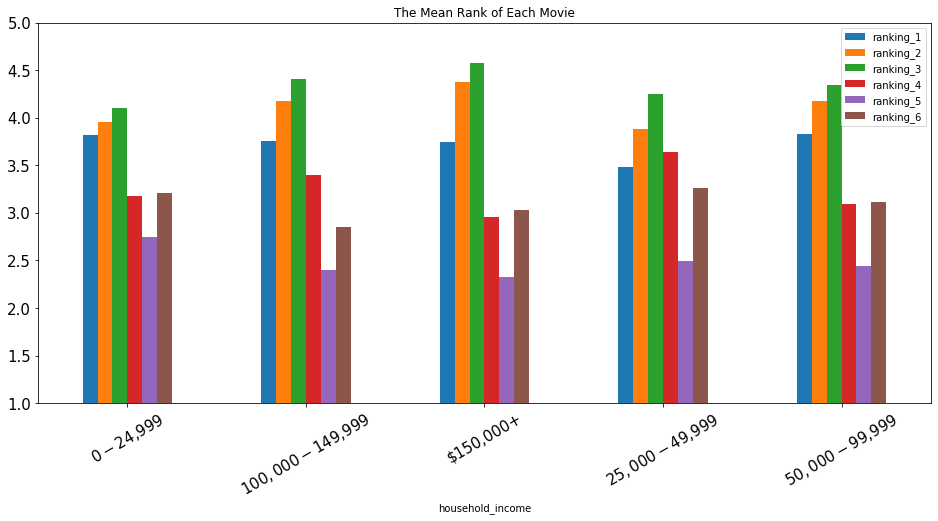

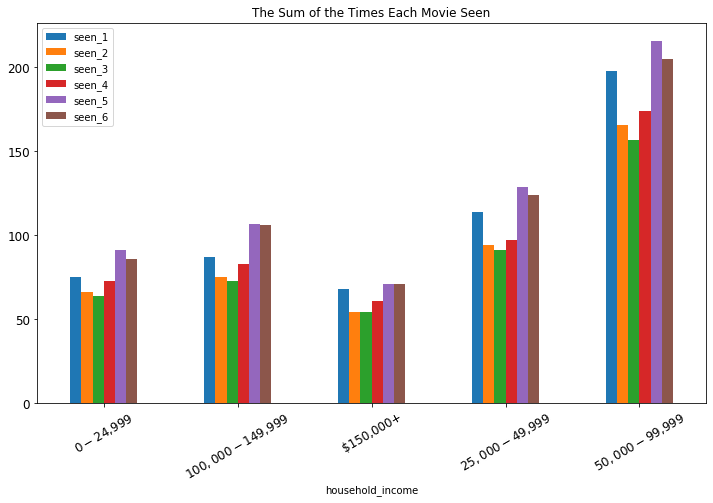

In [17]:
# Group the data based on household income calculating the mean of columns
grouped_income_mean = star_wars.groupby('household_income').agg(np.mean)

# Group the data based on household income calculating the sum of columns
grouped_income_sum = star_wars.groupby('household_income').agg(np.sum)

# The rank of movies based on household income
grouped_income_mean.iloc[:,9:15].plot.bar(title='The Mean Rank of Each Movie', figsize=(16,7), fontsize=15, rot=30, ylim=(1,5))
plt.show()

# The watch frequency of movies based on household income
grouped_income_sum.iloc[:,3:9].plot.bar(title='The Sum of the Times Each Movie Seen', figsize=(12,7), fontsize=12, rot=30)
plt.show()


What I observe is the preference of episodes among different income level groups look likes the same.

The frequency of episodes watched is the highest in __mid-level household income__ group and the lowest in the __high-level household income__ group.

# Character Analysis

Let's look at to the participants' favorability towards characters and find out which character is the __most and the least favorable__.

Then, I will investigate it further by analizing based on __whether the participant is Star Wars fan__ as well as __gender__.

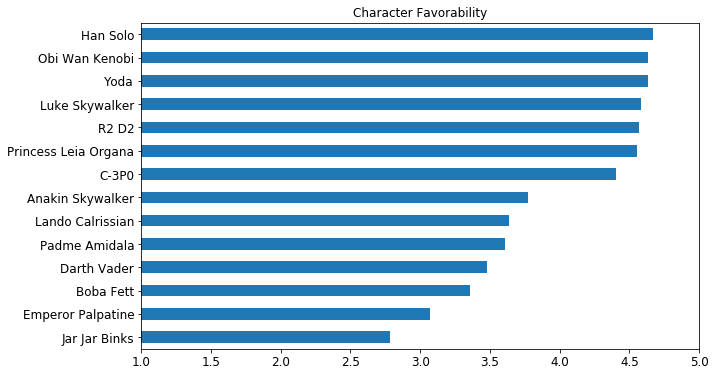

In [18]:
# Plot the mean favorability of characters
star_wars.iloc[:,15:29].mean().sort_values().plot.barh(title='Character Favorability', xlim=(1,5), figsize=(10,6), fontsize=12)
plt.show()

According to the plot, __Han Solo__ is the most favorable character with around __4.7 out of 5__ and __Jar Jar Binks__ is the least favorable character with around __2.8 out of 5__ in Star Wars Movies.

There is no such character considered as unfavorable by the majority of the participants.

## Character Favorabilirty Distribution Depending on Whether Star Wars Fan or not

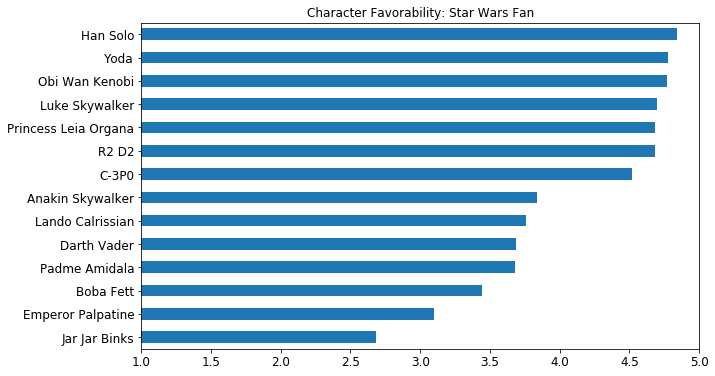

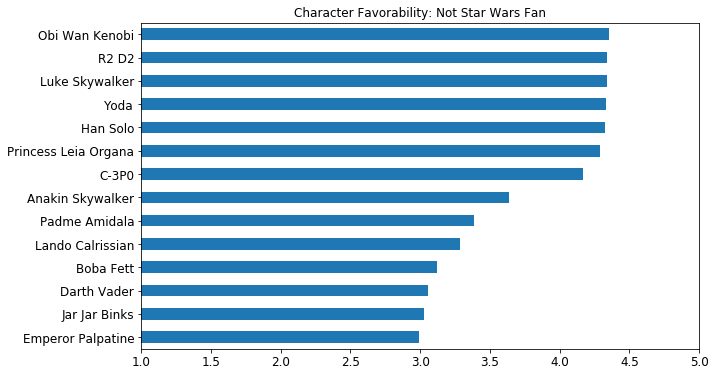

In [19]:
# Star Wars fan's character favorability distribution
star_wars[star_wars['fan_star_wars']==True].iloc[:,15:29].mean().sort_values().plot.barh(title='Character Favorability: Star Wars Fan', xlim=(1,5), figsize=(10,6), fontsize=12)
plt.show()

# Not Star Wars fan character favorability distribution
star_wars[star_wars['fan_star_wars']==False].iloc[:,15:29].mean().sort_values().plot.barh(title='Character Favorability: Not Star Wars Fan', xlim=(1,5), figsize=(10,6), fontsize=12)
plt.show()

In [20]:
# The table of differences in each charachter's favorability depending on whether the participant is a Star Wars fan or not
star_wars.pivot_table(index='fan_star_wars', values=['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'])

,Anakin Skywalker,Boba Fett,C-3P0,Darth Vader,Emperor Palpatine,Han Solo,Jar Jar Binks,Lando Calrissian,Luke Skywalker,Obi Wan Kenobi,Padme Amidala,Princess Leia Organa,R2 D2,Yoda
fan_star_wars,,,,,,,,,,,,,,
False,3.637931,3.118919,4.166038,3.059041,2.988235,4.327068,3.023923,3.283237,4.339416,4.351145,3.385093,4.290441,4.340741,4.328358
True,3.834879,3.446465,4.519196,3.685662,3.100410,4.839416,2.679920,3.759519,4.700000,4.767399,3.676892,4.686025,4.681818,4.777372


Interestingly, the most and the least favorable character differs whether being a Star Wars fan or not. 

For Star Wars fans, __Han Solo__ is the most and __Jar Jar Binks__ is the least favorable character while the min and max range is around __2.7__ and __4.8__, respectively.

For not Star Wars fans, __Obi Wan Kenobi__ is the most and __Emperor Palpatine__ is the least favorable character while the min and max range is around __3__ and __4.4__, respectively.

## Character Favorabilirty Distribution Depending on Gender

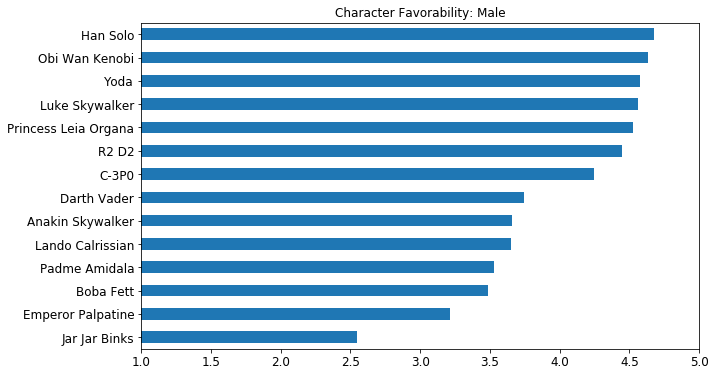

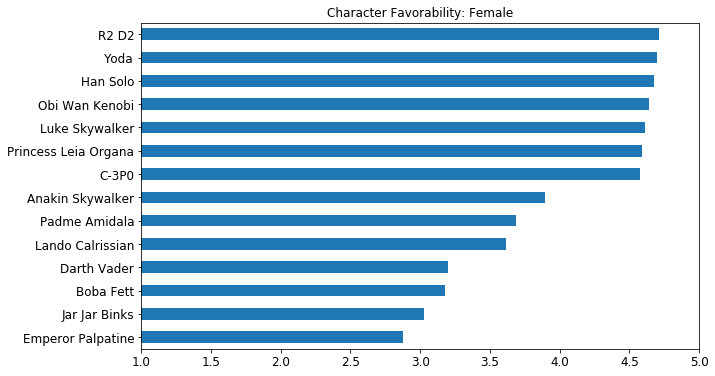

In [21]:
# Male's character favorability distribution
star_wars[star_wars['gender']=='Male'].iloc[:,15:29].mean().sort_values().plot.barh(title='Character Favorability: Male', xlim=(1,5), figsize=(10,6), fontsize=12)
plt.show()

# Female's character favorability distribution
star_wars[star_wars['gender']=='Female'].iloc[:,15:29].mean().sort_values().plot.barh(title='Character Favorability: Female', xlim=(1,5), figsize=(10,6), fontsize=12)
plt.show()

In [22]:
# The table of differences in each charachter favorability depending on gender
star_wars.pivot_table(index='gender', values=['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'])

,Anakin Skywalker,Boba Fett,C-3P0,Darth Vader,Emperor Palpatine,Han Solo,Jar Jar Binks,Lando Calrissian,Luke Skywalker,Obi Wan Kenobi,Padme Amidala,Princess Leia Organa,R2 D2,Yoda
gender,,,,,,,,,,,,,,
Female,3.892857,3.176871,4.578125,3.197436,2.874126,4.677922,3.024615,3.614865,4.612245,4.643411,3.687285,4.590793,4.712821,4.698210
Male,3.654731,3.486559,4.242718,3.746341,3.212291,4.675545,2.548387,3.653740,4.562500,4.634568,3.530612,4.528846,4.444444,4.577017


Investigating being a male or female influences the character favorability on average, What I found as results are completely satisfying. 

For males, __Han Solo__ is the most and __Jar Jar Binks__ is the least favorable character while the min and max range is around __2.5__ and __4.7__, respectively.

For females, __R2 D2__ is the most and __Emperor Palpatine__ is the least favorable character while the min and max range is around __2.9__ and __4.7__, respectively.

Some characters such as __R2 D2__, __Darth Vader__ and __Jar Jar Binks__ have a big difference on favorability among __male and female choise__.

## Finding the Most Controversial Character

Now, I will investigate __the most controversial character__ in Star Wars Movie. To do that, for each character, I will find the points given, from 1 to 5, to them separately. Then, I will sum 5s and 4s as well as 1s and 2s then substract from each other. At the end, the character having the minimum absoloute value will be the most controversial character.

In [23]:
# General look to the points given for each character
for col in star_wars.iloc[:,15:29]:
    print(col)
    print(star_wars[col].value_counts())
    

Han Solo
5.0    610
4.0    151
3.0     44
2.0      8
1.0      1
Name: Han Solo, dtype: int64
Luke Skywalker
5.0    551
4.0    219
3.0     38
2.0     13
1.0      3
Name: Luke Skywalker, dtype: int64
Princess Leia Organa
5.0    547
4.0    210
3.0     48
2.0     12
1.0      6
Name: Princess Leia Organa, dtype: int64
Anakin Skywalker
4.0    269
5.0    245
3.0    135
2.0     83
1.0     39
Name: Anakin Skywalker, dtype: int64
Obi Wan Kenobi
5.0    591
4.0    159
3.0     43
2.0      8
1.0      7
Name: Obi Wan Kenobi, dtype: int64
Emperor Palpatine
3.0    213
4.0    143
1.0    124
5.0    110
2.0     68
Name: Emperor Palpatine, dtype: int64
Darth Vader
5.0    309
4.0    171
1.0    149
2.0    102
3.0     84
Name: Darth Vader, dtype: int64
Lando Calrissian
3.0    236
4.0    223
5.0    142
2.0     63
1.0      8
Name: Lando Calrissian, dtype: int64
Boba Fett
3.0    248
4.0    153
5.0    138
2.0     96
1.0     45
Name: Boba Fett, dtype: int64
C-3P0
5.0    474
4.0    229
3.0     79
2.0     23
1.0    

In [24]:
# Find the most controversial character
most_controversial_character = {}
for col in star_wars.iloc[:,15:29]:
    fives = star_wars[col][star_wars[col]==5].count()
    fours = star_wars[col][star_wars[col]==4].count()
    twos = star_wars[col][star_wars[col]==2].count()
    ones = star_wars[col][star_wars[col]==1].count()
    most_controversial_character[col] = abs(fives + fours - twos - ones)
sorted_most_controversial_character = sorted(most_controversial_character.items(), key=operator.itemgetter(1))
sorted_most_controversial_character

[('Emperor Palpatine', 61),
 ('Jar Jar Binks', 64),
 ('Boba Fett', 150),
 ('Darth Vader', 229),
 ('Padme Amidala', 259),
 ('Lando Calrissian', 294),
 ('Anakin Skywalker', 392),
 ('C-3P0', 673),
 ('R2 D2', 731),
 ('Yoda', 733),
 ('Obi Wan Kenobi', 735),
 ('Princess Leia Organa', 739),
 ('Han Solo', 752),
 ('Luke Skywalker', 754)]

As I sorted out the characters with their points which show how controversial they are, the most controversial character is __Emperor Palpatine__ followed very closely by __Jar Jar Binks__. The least controversial character is __Luke Skywalker__ followed very closely by __Han Solo__.

# Fan Analysis 

I will analyze the __expanded universe fans__, __Star Trek fans__ and __Star Wars fans__ based on __gender__, __age__ and __education__.

## Gender-based Analysis

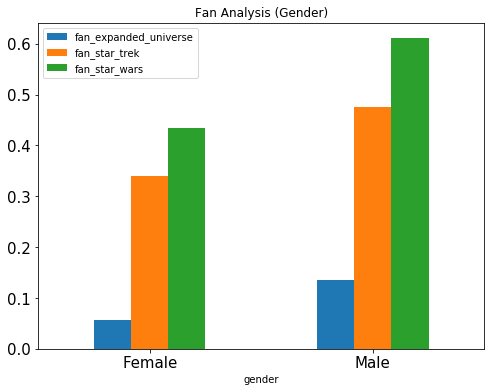

In [25]:
# Gender based analysis
star_wars.pivot_table(index=['gender'], values=['fan_expanded_universe', 'fan_star_wars', 'fan_star_trek']).plot.bar(title='Fan Analysis (Gender)', figsize=(8,6), fontsize=15, rot=0)


There are more __male fans__ on average than __female fans__ in each category. Both males and females are mostly fan of Star Wars, Star Trek and then expanded universe, respectively.

## Age-based Analysis

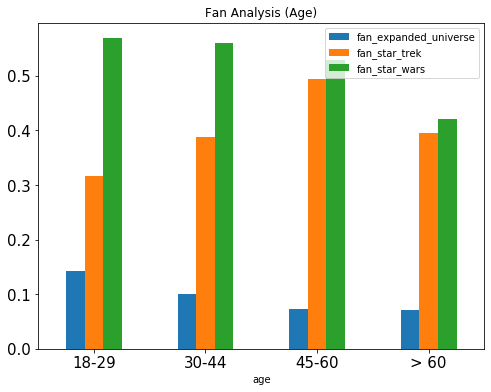

In [26]:
# Age based analysis
star_wars.pivot_table(index=['age'], values=['fan_expanded_universe', 'fan_star_wars', 'fan_star_trek']).plot.bar(title='Fan Analysis (Age)', figsize=(8,6), fontsize=15, rot=0)


For __expanded universe__ and __Star Wars__, there seems __a trend that the younger is the age, the more fans there are__. Contrarely, for __Star Trek__ it is __the visa versa__ except __the age older than 60__ which has the same average fan as __the age between 30-44__.

For each bracket of age, the most popular one is __Star Wars__, Star Trek and expanded universe, respectively. Also, __as the age is getting older, the ratio of fans between Star Wars and Star Trek is getting lower__. 

## Gender-Age-based Analysis

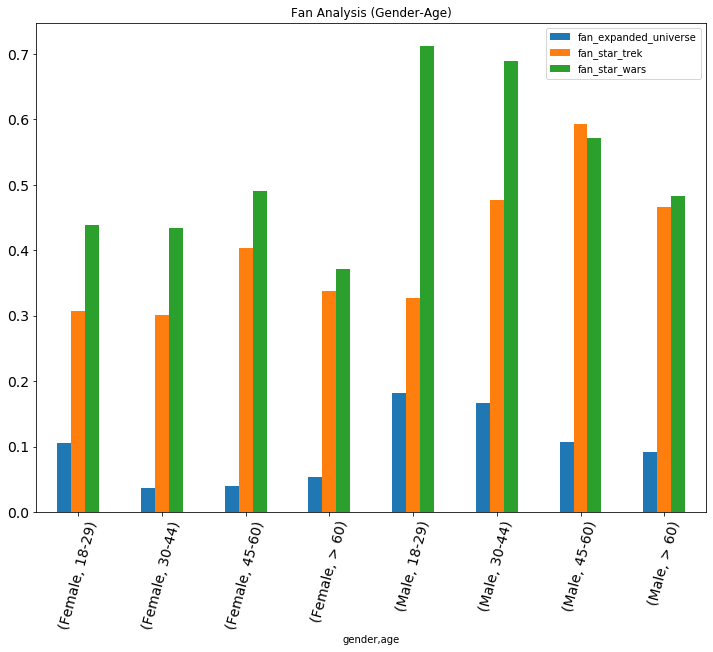

In [27]:
# Gender-Age based analysis
star_wars.pivot_table(index=['gender', 'age'], values=['fan_expanded_universe', 'fan_star_wars', 'fan_star_trek']).plot.bar(title='Fan Analysis (Gender-Age)', figsize=(12,9), fontsize=14, rot=75)


For the analysis based on both gender and age, there are more female fans of __Star Wars and Star Trek__ __between 45-60 year old__ as well as more female fans of __expanded universe__ __between 18-29 year old__ among female fans.

There are more male fans of __Star Wars and expanded universe__ __between 18-29 year old__ as well as more male fans of __Star Trek__ __between 45-60 year old__ among male fans.

__The preferences of different movies in the same universe as well as the universe itself__ are completely changed based on both __gender and age__.

## Education-based Analysis

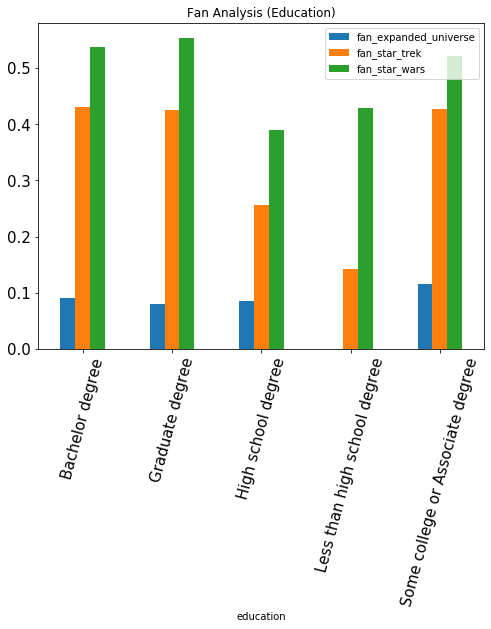

In [28]:
# Education based analysis
star_wars.pivot_table(index=['education'], values=['fan_expanded_universe', 'fan_star_wars', 'fan_star_trek']).plot.bar(title='Fan Analysis (Education)', figsize=(8,6), fontsize=15, rot=75)


According to the fan analysis based on education, There are more __graduate degree fan of Star Wars__ than any other fans with different education level. However, there are __almost same fans of Star Trek on average__ among __bachelor degree, graduate degree and college degree__. The fan of __expanded universe among fans with different level of education__ are __almost the same__ except there are no fans of expanded universe with less than high school degree.

Also, among fans with different education level, they all have __the same hierarchy in terms of average fans__ among the movies and the expanded universe which is __Star Wars, Star Trek and expanded universe, respectively__.

# Conclusion

As a conclusion, I firstly explore and clean the data to be prepared to analysis. In the cleaning part, I renamed the columns, removed unnecessary and wrong data, handled with missing as well as regular values to be more consistent and computable. 

After the cleaning process is done carefully, I performed the analysis separating into three parts shown below;

__1) Rank and Watch Analysis__
<br>
__2) Character Analysis__
<br>
__3) Fan Analysis__

During my analysis, I found out that __5th movie__ is the best movie for all participant groups that I took into consideration. Beside, I discovered interesting findings looking at different angles through the data.
